In [16]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('AAPL_5y.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-07,46.294998,46.917500,46.187500,46.290001,44.129246,169805600
1,2018-05-08,46.247501,46.555000,45.917500,46.512501,44.341358,113611200
2,2018-05-09,46.637501,46.849998,46.305000,46.840000,44.653564,92844800
3,2018-05-10,46.935001,47.592499,46.912498,47.509998,45.292290,111957200
4,2018-05-11,47.372501,47.514999,46.862499,47.147499,45.120029,104848800
...,...,...,...,...,...,...,...
1253,2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200
1254,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
1255,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
1256,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000


In [32]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2018-05-07,46.290001
1,2018-05-08,46.512501
2,2018-05-09,46.840000
3,2018-05-10,47.509998
4,2018-05-11,47.147499
...,...,...
1253,2023-04-28,169.679993
1254,2023-05-01,169.589996
1255,2023-05-02,168.539993
1256,2023-05-03,167.449997


In [33]:
import datetime
def str_date_to_date(date):
    year, month, day = map(int, date.split('-'))
    return datetime.datetime(year=year, month=month, day=day)

# str_date_to_date('2023-01-26')

In [34]:
df['Date'] = df['Date'].apply(str_date_to_date)

In [35]:
df.index = df.pop('Date')
df

,Close
Date,
2018-05-07,46.290001
2018-05-08,46.512501
2018-05-09,46.840000
2018-05-10,47.509998
2018-05-11,47.147499
...,...
2023-04-28,169.679993
2023-05-01,169.589996
2023-05-02,168.539993


In [36]:
import matplotlib.pyplot as plt

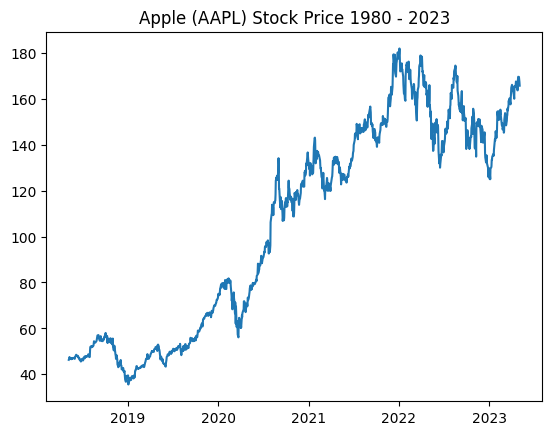

In [37]:
plt.plot(df)
plt.title('Apple (AAPL) Stock Price 1980 - 2023')
plt.show()

In [38]:
import numpy as np

In [39]:
def window_data(data, n=4):
    '''windows data
    for every date, 3 columns - prices of 3 days before, 2 and 1 day before are added
    
    '''
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'{i} Day(s) Before'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

In [40]:
df_windows = window_data(df)

In [41]:
df_windows = df_windows.reset_index()

In [42]:
df_windows

,Date,4 Day(s) Before,3 Day(s) Before,2 Day(s) Before,1 Day(s) Before,Target
0,2018-05-11,46.290001,46.512501,46.840000,47.509998,47.147499
1,2018-05-14,46.512501,46.840000,47.509998,47.147499,47.037498
2,2018-05-15,46.840000,47.509998,47.147499,47.037498,46.610001
3,2018-05-16,47.509998,47.147499,47.037498,46.610001,47.044998
4,2018-05-17,47.147499,47.037498,46.610001,47.044998,46.747501
...,...,...,...,...,...,...
1249,2023-04-28,165.330002,163.770004,163.759995,168.410004,169.679993
1250,2023-05-01,163.770004,163.759995,168.410004,169.679993,169.589996
1251,2023-05-02,163.759995,168.410004,169.679993,169.589996,168.539993
1252,2023-05-03,168.410004,169.679993,169.589996,168.539993,167.449997


In [43]:
df_nparrays = df_windows.to_numpy()

In [44]:
dates = df_nparrays[:,0]

In [45]:
prev_days_prices = df_nparrays[:,1:-1]
input_ = prev_days_prices.reshape(len(dates), prev_days_prices.shape[1], 1)
input_ = input_.astype(np.float32)

In [46]:
input_

array([[[ 46.29  ],
        [ 46.5125],
        [ 46.84  ],
        [ 47.51  ]],

       [[ 46.5125],
        [ 46.84  ],
        [ 47.51  ],
        [ 47.1475]],

       [[ 46.84  ],
        [ 47.51  ],
        [ 47.1475],
        [ 47.0375]],

       ...,

       [[163.76  ],
        [168.41  ],
        [169.68  ],
        [169.59  ]],

       [[168.41  ],
        [169.68  ],
        [169.59  ],
        [168.54  ]],

       [[169.68  ],
        [169.59  ],
        [168.54  ],
        [167.45  ]]], dtype=float32)

In [47]:
output = df_nparrays[:, -1]
output = output.astype(np.float32)

In [48]:
output

array([ 47.1475,  47.0375,  46.61  , ..., 168.54  , 167.45  , 165.79  ],
      dtype=float32)

In [49]:
dates.shape, input_.shape, output.shape

((1254,), (1254, 4, 1), (1254,))

In [50]:
eighty_percent = int(len(dates)*0.8)
ninety_percent = int(len(dates)*0.9)

dates_train = dates[:eighty_percent]
input_train = input_[:eighty_percent]
output_train = output[:eighty_percent]

dates_validate = dates[eighty_percent:ninety_percent]
input_validate = input_[eighty_percent:ninety_percent]
output_validate = output[eighty_percent:ninety_percent]

dates_test = dates[ninety_percent:]
input_test = input_[ninety_percent:]
output_test = output[ninety_percent:]

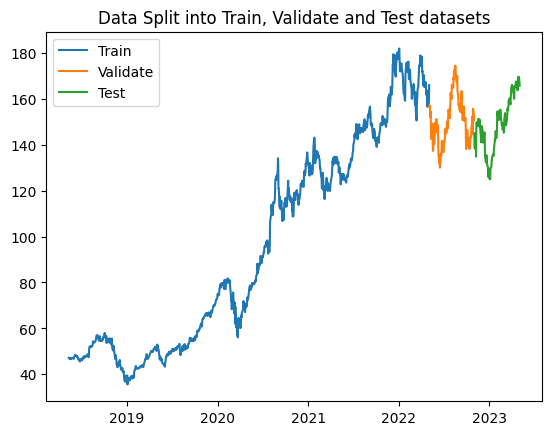

In [51]:
plt.plot(dates_train, output_train, label='Train')
plt.plot(dates_validate, output_validate, label='Validate')
plt.plot(dates_test, output_test, label='Test')
plt.legend()
plt.title('Data Split into Train, Validate and Test datasets')
plt.show()

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [58]:
model = Sequential(
    [
        layers.Input((4,1)),
        layers.LSTM(64), 
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ]
)

2023-05-06 03:26:56.513474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 03:26:56.518074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 03:26:56.522346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [59]:
model.compile(
    loss = 'mse',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

In [60]:
model.fit(
    input_train, 
    output_train,
    validation_data=(
        input_validate, 
        output_validate
    ),
    epochs=15,
)

Epoch 1/15


2023-05-06 03:27:01.216952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 03:27:01.221919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 03:27:01.225536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/32 [==========================>...] - ETA: 0s - loss: 10631.5967 - mean_absolute_error: 93.0148

2023-05-06 03:27:07.267448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 03:27:07.271917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 03:27:07.275188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

32/32 [==============================] - 7s 48ms/step - loss: 10627.7236 - mean_absolute_error: 93.0121 - val_loss: 21609.9668 - val_mean_absolute_error: 146.6380
Epoch 2/15
32/32 [==============================] - 0s 13ms/step - loss: 9179.2305 - mean_absolute_error: 84.4467 - val_loss: 17276.4355 - val_mean_absolute_error: 131.0266
Epoch 3/15
32/32 [==============================] - 0s 13ms/step - loss: 5137.7524 - mean_absolute_error: 56.0142 - val_loss: 7231.1050 - val_mean_absolute_error: 84.3827
Epoch 4/15
32/32 [==============================] - 0s 14ms/step - loss: 2117.3069 - mean_absolute_error: 40.1548 - val_loss: 2864.7061 - val_mean_absolute_error: 52.5239
Epoch 5/15
32/32 [==============================] - 0s 14ms/step - loss: 1467.7054 - mean_absolute_error: 34.0331 - val_loss: 1973.6860 - val_mean_absolute_error: 43.3472
Epoch 6/15
32/32 [==============================] - 0s 13ms/step - loss: 326.9254 - mean_absolute_error: 10.2828 - val_loss: 156.6016 - val_mean_absolu

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________


In [62]:
train_predictions = model.predict(input_train).flatten()
validation_predictions = model.predict(input_validate).flatten()
test_predictions = model.predict(input_test).flatten()

2023-05-06 03:27:26.790133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 03:27:26.804929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 03:27:26.808719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 0s 6ms/step


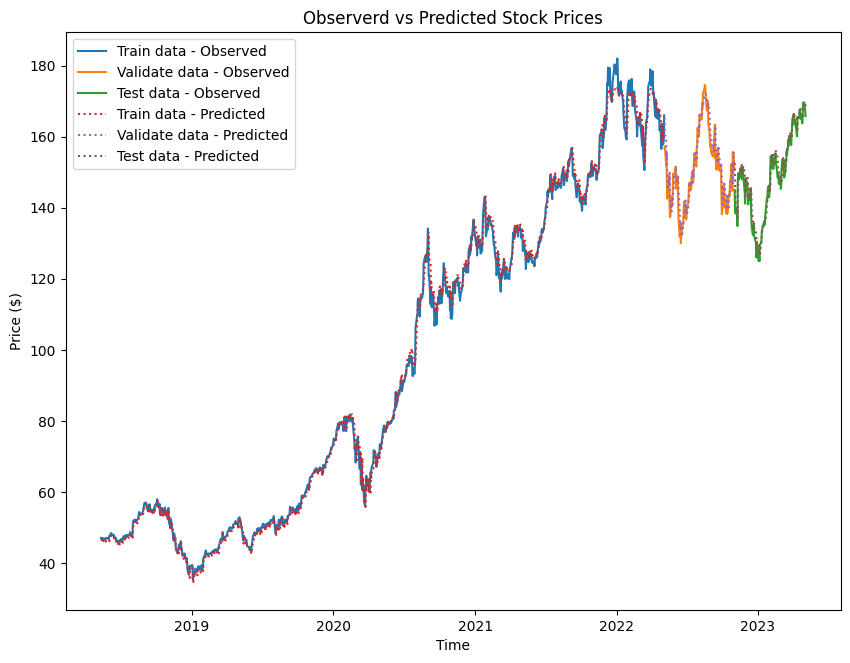

In [63]:
plt.figure(figsize = [10, 10*3/4])
plt.plot(dates_train, output_train, label='Train data - Observed')
plt.plot(dates_validate, output_validate, label='Validate data - Observed')
plt.plot(dates_test, output_test, label='Test data - Observed')
plt.plot(dates_train, train_predictions, linestyle='dotted', label='Train data - Predicted')
plt.plot(dates_validate, validation_predictions, linestyle='dotted', label='Validate data - Predicted')
plt.plot(dates_test, test_predictions, linestyle='dotted', label='Test data - Predicted')
plt.legend()
plt.title('Observerd vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.savefig('AAPL_Predicted-5y.png')
plt.show()

In [65]:
model.predict([[
    [169.40],
    [168.60], # May 2nd 8pm ET
    [165.60], # May 3rd 8pm ET
    [169.92] # May 4th 8pm ET
]]).flatten()[0]

# prediction of stock price of aapl (apple) at 8pm ET on May 5th

1/1 [==============================] - 0s 246ms/step


169.05814

In [66]:
model.predict([[
    [169.43], # May 2nd 9.30am ET
    [170.06], # May 2nd 9.30am ET
    [169.64], # May 3rd 9.30am ET
    [167.90] # May 4th 9.30am ET
]]).flatten()[0]

# prediction of stock price of aapl (apple) at 9.30am ET on May 5th

1/1 [==============================] - 0s 154ms/step


168.96426

actual price

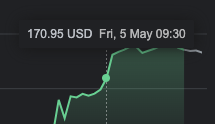